In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

In [8]:
# go one step back in directorY
import os
print(os.getcwd())
os.chdir("..")
# check the current directory
print(os.getcwd())
from deep_nn import l_layer_nn as lnn
# go one step ahead in directory
os.chdir("application")
print(os.getcwd()) 

c:\Users\kruth\OneDrive\Desktop\DL_basics\application
c:\Users\kruth\OneDrive\Desktop\DL_basics
c:\Users\kruth\OneDrive\Desktop\DL_basics\application


In [9]:
# Define directories
train_dir = "C:\\Users\\kruth\\Datasets\\DL_Basics\\Pneumonia\\archive\\chest_xray\\train"
validation_dir = "C:\\Users\\kruth\\Datasets\\DL_Basics\\Pneumonia\\archive\\chest_xray\\val"
test_dir = "C:\\Users\\kruth\\Datasets\\DL_Basics\\Pneumonia\\archive\\chest_xray\\test"

# Function to load images and labels
def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            # Read image using OpenCV
            image = cv2.imread(image_path)
            # Resize image to a consistent size (e.g., 150x150)
            image = cv2.resize(image, (64, 64))
            # Normalize pixel values to the range [0, 1]
            image = image / 255.0
            # Append image and label to lists
            images.append(image)
            labels.append(1 if label == 'PNEUMONIA' else 0)  # Assign label based on folder name
    return np.array(images), np.array(labels)

In [10]:
# Load training images and labels
X_train_orig, y_train_orig = load_images_from_directory(train_dir)
# Load validation images and labels
X_val_orig, y_val_orig = load_images_from_directory(validation_dir)
# Load test images and labels
X_test_orig, y_test_orig = load_images_from_directory(test_dir)

In [ ]:
# Print shape of the arrays
print("Shape of X_train:", X_train_orig.shape)
print("Shape of y_train:", y_train_orig.shape)
print("Shape of X_val:", X_val_orig.shape)
print("Shape of y_val:", y_val_orig.shape)
print("Shape of X_test:", X_test_orig.shape)
print("Shape of y_test:", y_test_orig.shape)

Shape of X_train: (5216, 64, 64, 3)
Shape of y_train: (5216,)
Shape of X_val: (16, 64, 64, 3)
Shape of y_val: (16,)
Shape of X_test: (624, 64, 64, 3)
Shape of y_test: (624,)


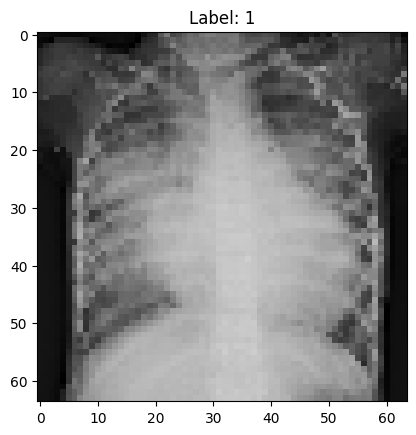

In [15]:
# show a sample image and label
index = 5201
plt.imshow(X_train_orig[index])
plt.title("Label: " + str(y_train_orig[index]))
plt.show()

In [16]:
# flatten the X_train, X_val, X_test
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_val = X_val_orig.reshape(X_val_orig.shape[0], -1).T
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# transpose the y_train, y_val, y_test and keep it in the same shape
y_train = y_train_orig.reshape(1, -1)
y_val = y_val_orig.reshape(1, -1)
y_test = y_test_orig.reshape(1, -1)

# print final shape of the arrays
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12288, 5216)
Shape of y_train: (1, 5216)
Shape of X_val: (12288, 16)
Shape of y_val: (1, 16)
Shape of X_test: (12288, 624)
Shape of y_test: (1, 624)


In [17]:
"""# store data in csv files
np.savetxt("data/X_train.csv", X_train, delimiter=",")
np.savetxt("data/y_train.csv", y_train, delimiter=",")
np.savetxt("data/X_val.csv", X_val, delimiter=",")
np.savetxt("data/y_val.csv", y_val, delimiter=",")
np.savetxt("data/X_test.csv", X_test, delimiter=",")
np.savetxt("data/y_test.csv", y_test, delimiter=",")"""

In [18]:
# define architecture of the model
layers_dims = [X_train.shape[0], 20, 7, 5, 1]

In [19]:
parameters, cost = lnn.L_layer_model(X_train, y_train, layers_dims, learning_rate = 0.1, num_iterations = 200, print_cost=True)

Cost after iteration 0: 0.6118088105903126
Cost after iteration 100: 0.5733133357528698
Cost after iteration 199: 0.5699949435315539


In [20]:
# predict the train, validation and test set
pred_train = lnn.predict(X_train, y_train, parameters)
pred_val = lnn.predict(X_val, y_val, parameters)
pred_test = lnn.predict(X_test, y_test, parameters)

Accuracy: 0.7429064417177914
Accuracy: 0.5
Accuracy: 0.6249999999999999
